<a href="https://colab.research.google.com/github/RangsimanDev/ImageProcessing/blob/main/ImageProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import cv2 as cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
from tqdm.notebook import tqdm
np.random.seed(1)
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import os, os.path
from os import walk
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
print("Connect Google Drive Success!")

Mounted at /content/drive
Connect Google Drive Success!


In [2]:
#Read Data from Train
pathD_train =  '/content/drive/MyDrive/Project-Data/Durian/Train/' #ใส่ path
nameDir =  ['Unripe','Ripe']
num_class=2

target_train=[]
y_train_one_hot=[]
data_train=[]
for i in range(len(nameDir)) :
  print(i)
  num_target=str(i)
  print(pathD_train+nameDir[i])
  path, dirs, files = next(os.walk(pathD_train+nameDir[i]))  #ใส่ path
  len_file = len(files)
  for j in range(len_file):
    num_pic=str(j+1)
    print(str(pathD_train)+nameDir[i]+"/"+num_target+" ("+num_pic+").jpg" )
    img = Image.open(str(pathD_train)+nameDir[i]+"/"+num_target+" ("+num_pic+").jpg" ) #ใส่ path
    img =  img.resize((224,224))
    img = np.array(img)
    data_train.append(img) #ใส่ ตัวแปรเก็บข้อมูลให้ถูก
    target_train.append([int(num_target)]) #ใส่ ตัวแปรเก็บข้อมูลtargetให้ถูก
    #target.append(encoder.transform([[int(num_target)]]).toarray())
    y_train_one_hot.extend([list([eval(num_target)])]) #ใส่ ตัวแปรเก็บข้อมูลtargetแบบ encode ให้ถูก


data_train=np.asarray(data_train)
target_train=np.asarray(target_train)
data_train = (data_train/ 255.0)
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train_one_hot)
from sklearn.utils import shuffle
data_train, target_train = shuffle(data_train, target_train)

0
/content/drive/MyDrive/Project-Data/Durian/Train/Unripe
/content/drive/MyDrive/Project-Data/Durian/Train/Unripe/0 (1).jpg
/content/drive/MyDrive/Project-Data/Durian/Train/Unripe/0 (2).jpg
/content/drive/MyDrive/Project-Data/Durian/Train/Unripe/0 (3).jpg
/content/drive/MyDrive/Project-Data/Durian/Train/Unripe/0 (4).jpg
/content/drive/MyDrive/Project-Data/Durian/Train/Unripe/0 (5).jpg
/content/drive/MyDrive/Project-Data/Durian/Train/Unripe/0 (6).jpg
/content/drive/MyDrive/Project-Data/Durian/Train/Unripe/0 (7).jpg
/content/drive/MyDrive/Project-Data/Durian/Train/Unripe/0 (8).jpg
/content/drive/MyDrive/Project-Data/Durian/Train/Unripe/0 (9).jpg
/content/drive/MyDrive/Project-Data/Durian/Train/Unripe/0 (10).jpg
/content/drive/MyDrive/Project-Data/Durian/Train/Unripe/0 (11).jpg
/content/drive/MyDrive/Project-Data/Durian/Train/Unripe/0 (12).jpg
/content/drive/MyDrive/Project-Data/Durian/Train/Unripe/0 (13).jpg
/content/drive/MyDrive/Project-Data/Durian/Train/Unripe/0 (14).jpg
/content/driv

In [3]:
#Read Data from Test
pathD_test =  '/content/drive/MyDrive/Project-Data/Durian/Test/' #ใส่ path
nameDir =  ['Unripe','Ripe']
num_class=2
target_test=[]
y_test_one_hot=[]
data_test=[]
for i in range(len(nameDir)) :
  print(i)
  num_target=str(i)
  path, dirs, files = next(os.walk(pathD_test+nameDir[i]))  #ใส่ path
  len_file = len(files)
  for j in range(len_file):
    num_pic=str(j+1)
    img = Image.open(str(pathD_test)+nameDir[i]+"/"+num_target+" ("+num_pic+").jpg" ) #ใส่ path
    img =  img.resize((224,224))
    img = np.array(img)
    data_test.append(img) #ใส่ ตัวแปรเก็บข้อมูลให้ถูก
    target_test.append([int(num_target)]) #ใส่ ตัวแปรเก็บข้อมูลtargetให้ถูก
    y_test_one_hot.extend([list([eval(num_target)])]) #ใส่ ตัวแปรเก็บข้อมูลtargetแบบ encode ให้ถูก


data_test=np.asarray(data_test)
target_test=np.asarray(target_test)
data_test = (data_test/ 255.0)
from keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test_one_hot )
from sklearn.utils import shuffle
data_test, target_test = shuffle(data_test, target_test)

0
1


In [4]:
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D , MaxPooling2D ,GlobalAveragePooling2D ,Flatten , Dense , Dropout

#from keras.layers.normalization.batch_normalization import BatchNormalization
#initialize the CNN
model = Sequential()
#Step1-Convolution
#32 filters (3x3), img 64x63 RGB
model.add(Conv2D(32,kernel_size=(3, 3), strides=(1, 1), input_shape=(224, 224, 3), padding='same', activation='relu'))
#Step2-MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#Step3-Flattening
model.add(Flatten())
#Step4-Full Connection
#first layer has 128 neurons and the activation function ReLu.
#last layer of this neural network with 10 neurons (one for each label) using the sigmoid function.
model.add(Dense(units = 128,  activation ='relu'))
model.add(Dense(units = 2))
#Compiling the CNN
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
#สร้าง โมเดล CNN
import tensorflow as tf
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(data_train, target_train, epochs=10,
                    validation_data=(data_test, target_test))

Epoch 1/10
11/11 [==============================] - 25s 2s/step - loss: 23.7525 - accuracy: 0.5286 - val_loss: 0.6983 - val_accuracy: 0.7500
Epoch 2/10
11/11 [==============================] - 26s 2s/step - loss: 1.2721 - accuracy: 0.6000 - val_loss: 0.3206 - val_accuracy: 1.0000
Epoch 3/10
11/11 [==============================] - 21s 2s/step - loss: 0.3633 - accuracy: 0.8114 - val_loss: 0.1511 - val_accuracy: 1.0000
Epoch 4/10
11/11 [==============================] - 21s 2s/step - loss: 0.2119 - accuracy: 0.9171 - val_loss: 0.0723 - val_accuracy: 1.0000
Epoch 5/10
11/11 [==============================] - 21s 2s/step - loss: 0.1433 - accuracy: 0.9686 - val_loss: 0.1128 - val_accuracy: 1.0000
Epoch 6/10
11/11 [==============================] - 22s 2s/step - loss: 0.0841 - accuracy: 0.9800 - val_loss: 0.1145 - val_accuracy: 1.0000
Epoch 7/10
11/11 [==============================] - 20s 2s/step - loss: 0.0462 - accuracy: 0.9943 - val_loss: 0.0490 - val_accuracy: 1.0000
Epoch 8/10
11/11 [=

1/1 - 0s - loss: 0.0189 - accuracy: 1.0000


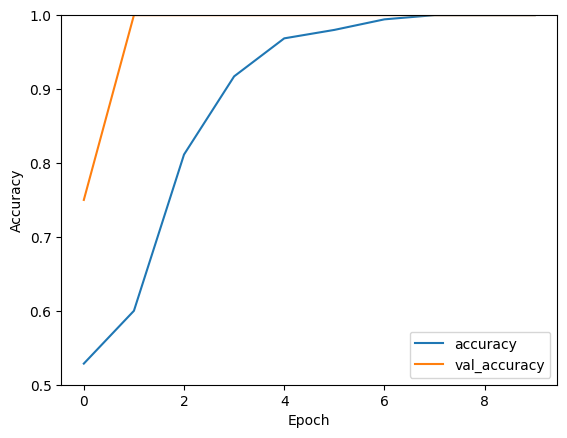

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy') #ของ Train
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(data_test,  target_test, verbose=2)

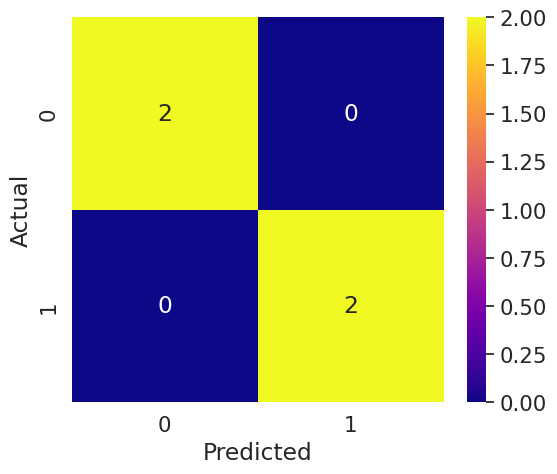

In [9]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score, recall_score
import seaborn as sn
import pandas as pd
y_true=target_test.reshape(4,) #กำหนดให้มันมีรูปแบบเป็น array 1 มิติที่มีความยาว 10
#y_true = np.argmax(target_test, axis=1)
y_pred = np.argmax(model.predict(data_test), axis=1)
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual' #ค่าจริง
df_cm.columns.name = 'Predicted' #ค่าคาดการณ์
plt.figure(figsize = (6,5))
sn.set(font_scale=1.4)#for label size
#sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

sn.heatmap(df_cm, annot=True, fmt="d", cmap="plasma");

In [14]:
#https://colab.research.google.com/github/syamkakarla98/Face_Recognition_Using_Convolutional_Neural_Networks/blob/master/CNN.ipynb#scrollTo=KeUCfJC_MADK
def plot_predictions(r=4 ,c =1):
  w=10
  h=10
  fig=plt.figure(figsize=(12, 20))
  columns = c
  rows = r
  for i in range(1, columns*rows +1):
      fig.add_subplot(rows, columns, i)
      rand_n = np.random.randint(data_test.shape[0])

      plt.imshow(data_test[rand_n][:, :, :])
      #print(rand_n)
      plt.title(f'Actual:{y_true[rand_n]} Predicted: {np.argmax(model.predict(data_test[rand_n].reshape(-1, 224, 224, 3)))}',fontsize = 9)
      plt.axis('off')
  plt.show()

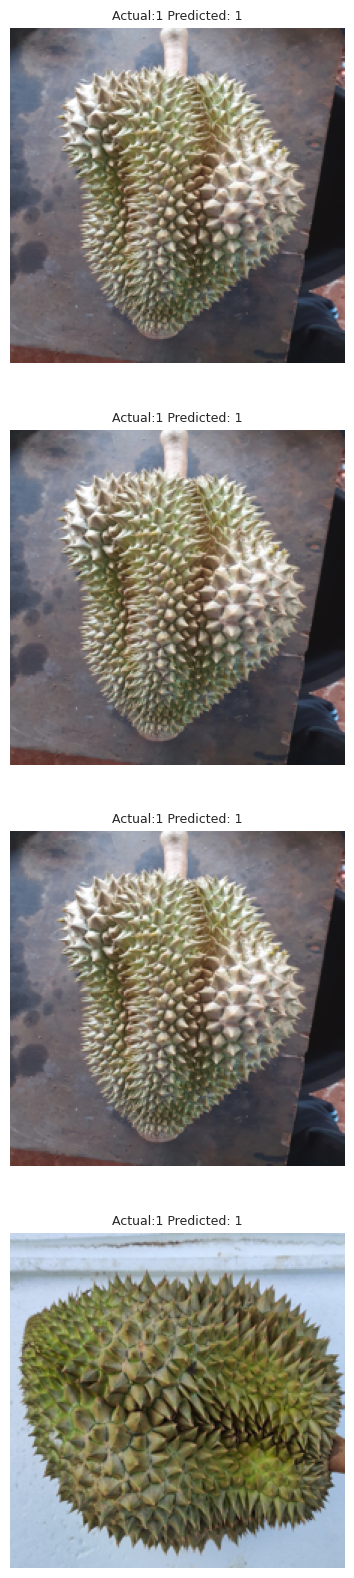

In [16]:
 plot_predictions()